# Árvores de regressão - exercícios 01

Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```median_house_value```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição | Tipo |
|-|-|-|
|longitude| Uma medida do oeste de uma casa. Um valor mais negativo está mais a oeste | Contínua |
|latitude| Uma medida do norte mais alto de uma casa. Um valor maior é mais ao norte | Contínua |
|housingmedianage| Idade mediana de uma casa em um bloco. Um número menor é um edifício mais recente | Contínua |
|total_rooms| Número total de salas em um bloco | Contínua |
|total_bedrooms| Número total de quartos em um bloco | Contínua |
|population| Número total de pessoas que residem em um bloco | Contínua |
|households| Número total de residências, um grupo de pessoas que moram em uma unidade residencial, para um bloco | Contínua |
|median_income| Renda mediana para famílias em um bloco de casas (medida em dezenas de milhares de dólares americanos) | Contínua |
|median_house_value| (variável resposta) Valor mediano da casa para casas em um bloco (medido em dólares americanos) | Contínua |
|ocean_proximity| Proximidade com o oceâno | Categórica |

In [440]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import warnings

In [401]:
warnings.filterwarnings('ignore')

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
Leitura do Dataset:

In [150]:
df = pd.read_csv('housing.csv', delimiter = ',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [154]:
df.shape

(20640, 10)

Análise do Dataset para identificar o tipo da variável, valore únicos, possiveis missing values e qual a porcentagem do mesmo dentro do Dataset:

In [234]:
metadados = pd.DataFrame({'dtypes': df.dtypes})
metadados['missing'] = df.isnull().sum()
metadados['perc_missing'] = round((metadados['missing']/df.shape[0])*100)
metadados['valores_unicos'] = df.nunique()

metadados

,dtypes,missing,perc_missing,valores_unicos
longitude,float64,0,0.0,844
latitude,float64,0,0.0,862
housing_median_age,float64,0,0.0,52
total_rooms,float64,0,0.0,5926
total_bedrooms,float64,207,1.0,1923
population,float64,0,0.0,3888
households,float64,0,0.0,1815
median_income,float64,0,0.0,12928
median_house_value,float64,0,0.0,3842
ocean_proximity,object,0,0.0,5


Como os missing values representam apenas 1% da base de dados, eliminá-los não irá causar grandes perdas:

In [238]:
df.dropna(axis = 0, inplace = True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Tratamento da variável do tipo str:

In [240]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [242]:
df['ocean_proximity'].replace({'<1H OCEAN': 1,
                              'INLAND': 2,
                              'NEAR OCEAN': 3,
                              'NEAR BAY': 4,
                              'ISLAND': 5},
                              inplace = True)

Tabela relacionando os valores antigos aos novos da variável ocean_proximity:

| Valores str | Valores int |
|-|-|
|<1H OCEAN| 1 |
|INLAND| 2 |
|NEAR OCEAN| 3 |
|NEAR BAY| 4 |
|ISLAND| 5 |

Verificando como ficou o Dataset:

In [245]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

Matriz de correlação:

In [247]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.439787
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.390885
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.145469
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.016174
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.021466
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.083097
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.027488
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.039270
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.020952
ocean_proximity,-0.439787,0.390885,0.145469,-0.016174,-0.021466,-0.083097,-0.027488,-0.039270,0.020952,1.000000


Pode-se verificar que há uma variável que se correlaciona de maneira mais forte com a variável median_house_value, e há outras duas que se correlacionam de maneira mais fraca. 

Pela seguinte tabela as informações ficam mais claras:

| Variáveis que se correlacionam com median_house_value: | Porcentagem de correlação: |
|-|-|
| Variável median_income | 68,83% |
| Variável total_rooms | 13,33% |
| Variável housing_median_age | 10,63% |

Clustermap da a matriz de correlação para melhor identificá-las:

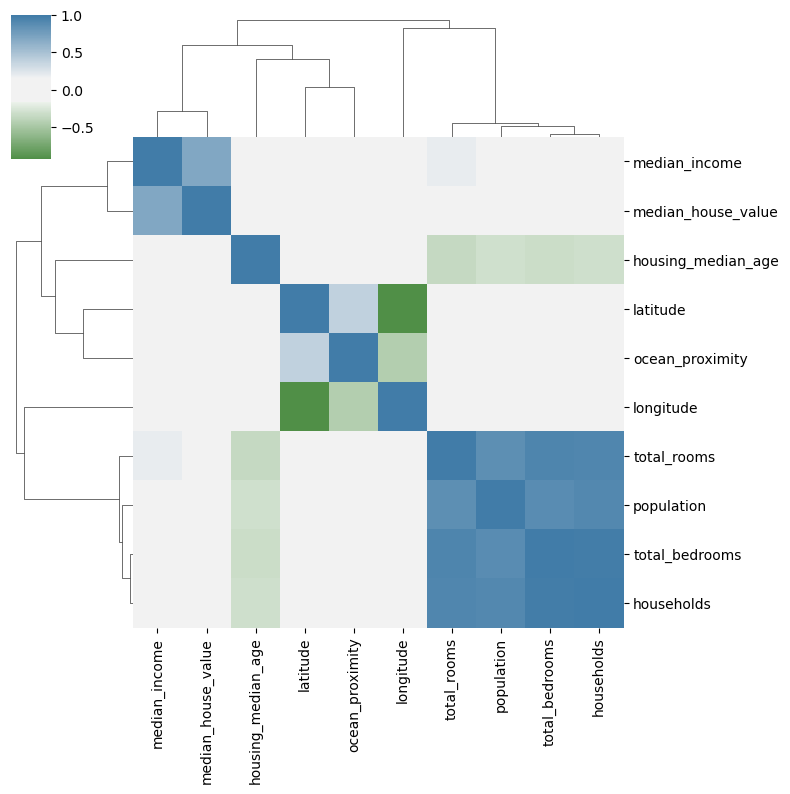

In [249]:
color = sns.diverging_palette(h_neg=125, 
                              h_pos=600,
                              as_cmap=True,
                              sep = 40, 
                              center = 'light')

sns.clustermap(df.corr(), 
               figsize=(8, 8), 
               center = 0,
               cmap=color)

A partir do clustermap feito para a matriz de correlação, pode-se identificar que a variável de maior importância é a median_income, estando colorida de forma a estar mais próxima de 100%.

Gráfico relacionando a variável median_income com median_house_value:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


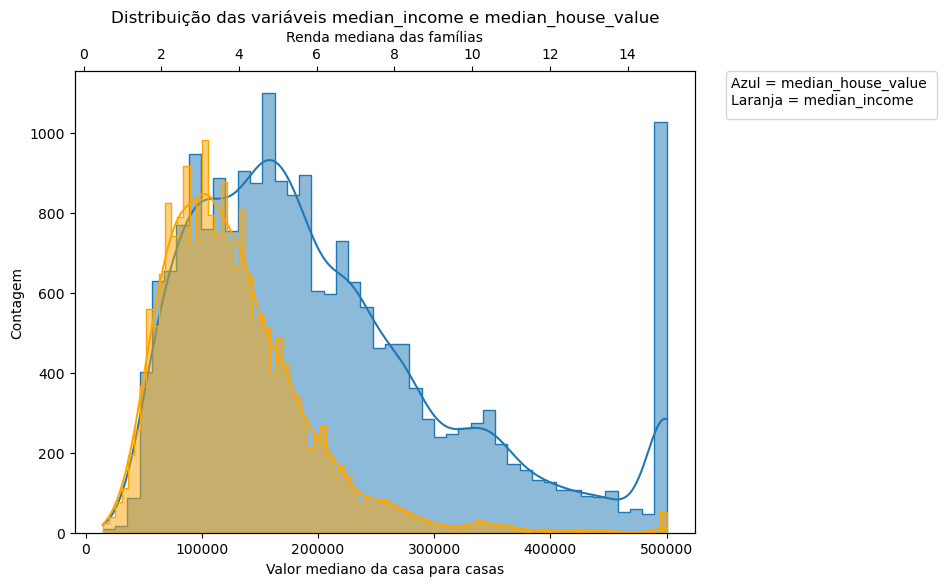

In [428]:
plt.rc('figure', figsize=(8, 6))

ax = sns.histplot(data=df,
                  x='median_house_value',
                  kde=True,
                  element='step'
                 )

plt.ylabel('Contagem')
plt.xlabel('Valor mediano da casa para casas')

ax2 = ax.twiny()
ax2 = sns.histplot(data=df,
                   x='median_income',
                   kde=True,
                   element='step',
                   color ='Orange'
                  )

plt.xlabel('Renda mediana das famílias')
plt.title('Distribuição das variáveis median_income e median_house_value')
plt.legend(title = 'Azul = median_house_value \nLaranja = median_income',
                bbox_to_anchor = (1.05, 1),
                loc = 2,
                borderaxespad = 0,
                )

Gráfico relacionando as variáveis median_house_value e median_income:

Text(0, 0.5, 'Renda mediana das famílias')

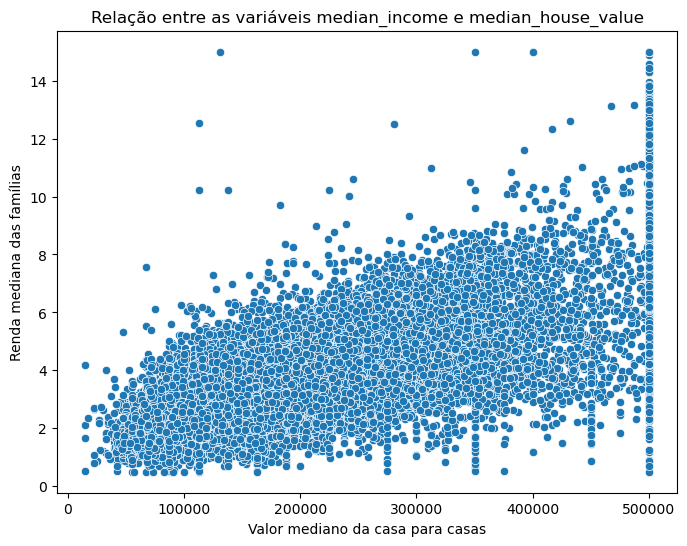

In [426]:
plt.rc('figure', figsize=(8, 6))

sns.scatterplot(df, 
                x = 'median_house_value',
                y = 'median_income'
               )

plt.title('Relação entre as variáveis median_income e median_house_value')
plt.xlabel('Valor mediano da casa para casas')
plt.ylabel('Renda mediana das famílias')

Fica claro que de acordo com a matriz de correlção a variável com maior potêncial preditivo é median_income, que de acordo com os gráficos está fortemente relacionada com median_house_value.

### 3. Separe os dados em validação e teste

Separação entre matriz de recursos X e vetor de destino y:

In [251]:
X = df.drop(columns = ['median_house_value']).copy()
y = df[['median_house_value']].copy()

In [253]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,4


In [255]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [257]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [259]:
y.columns

Index(['median_house_value'], dtype='object')

Separação dos dados em validação e teste:

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2309)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [324]:
regr_tree_8 = DecisionTreeRegressor(max_depth=8)
regr_tree_2 = DecisionTreeRegressor(max_depth=2)

regr_tree_8.fit(X_train, y_train)
regr_tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [328]:
mse_8 = regr_tree_8.score(X_train, y_train)
mse_2 = regr_tree_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade {0} é: {1:.2f}"

print(template.format(regr_tree_8.get_depth(),mse_8).replace(".",","))
print(template.format(regr_tree_2.get_depth(),mse_2).replace(".",","))


O MSE da árvore com profundidade 8 é: 0,78
O MSE da árvore com profundidade 2 é: 0,45


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

De acordo com o erro quadrático médio, a árvore que parece mais adequada é aquela com profundidade 2, pois possui o menor MSE.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

Árvore com profundidade 2, como o menor MSE:

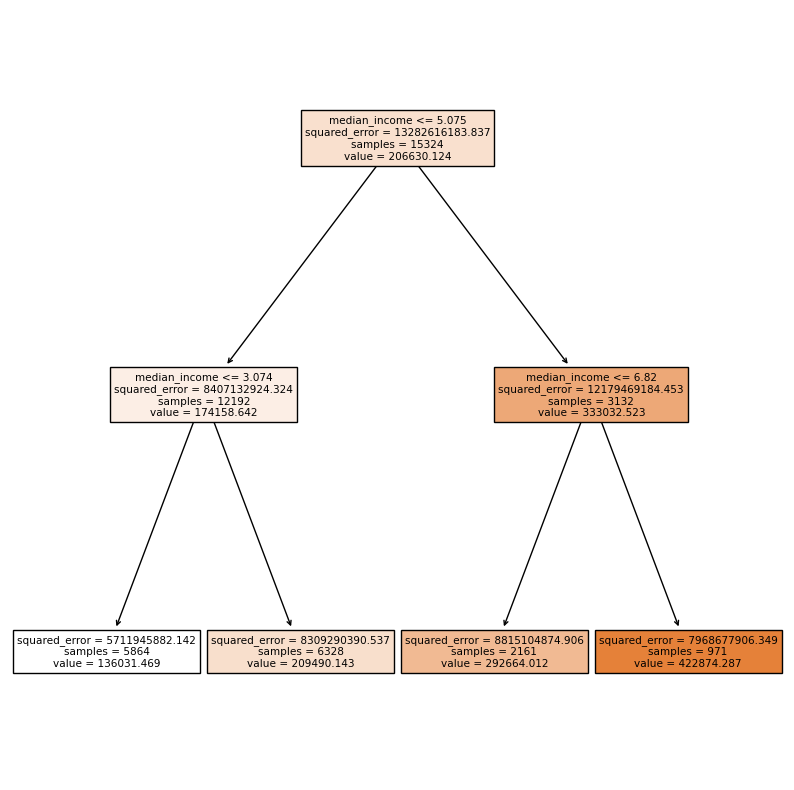

In [437]:
plt.rc('figure', figsize=(10, 10))
tree_plot_2 = tree.plot_tree(regr_tree_2, 
                    feature_names=X.columns,  
                    filled=True) 

A variável mais importante na árvore seria a median_income, pois é ela que possui maior potencial preditivo.